In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
# Set the stock symbol and start and end dates
symbol = 'APLN.JK'
start_date = '2023-01-03'
end_date = '2023-04-03'

In [3]:
# Retrieve stock data from Yahoo Finance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Calculate support and resistance levels using the pivot point method
high = stock_data['High']
low = stock_data['Low']
close = stock_data['Close']

pivot = (high + low + close) / 3
support1 = (pivot * 2) - high
resistance1 = (pivot * 2) - low

support2 = pivot - (high - low)
resistance2 = pivot + (high - low)

support3 = support1 - (high - low)
resistance3 = resistance1 + (high - low)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate the Fibonacci levels using the highest and lowest prices over the selected period
high_price = stock_data['High'].max()
low_price = stock_data['Low'].min()
price_range = high_price - low_price
fib_levels = [high_price - (0.236 * price_range),
              high_price - (0.382 * price_range),
              high_price - (0.5 * price_range),
              high_price - (0.618 * price_range),
              high_price - (0.764 * price_range),
              low_price]

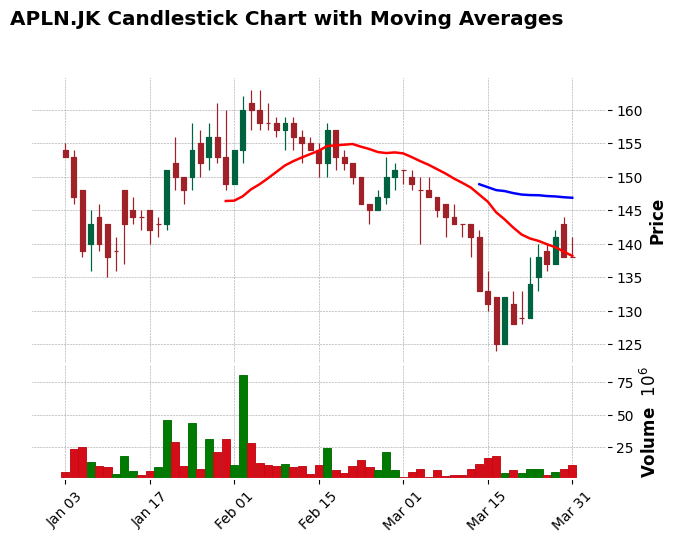

In [5]:
# Calculate the 20-day and 50-day moving averages
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

# Plot the stock chart with support and resistance levels, moving averages, and volume
mpf.plot(stock_data, type='candle', style='charles', mav=(20, 50),
         volume=True, title= symbol+' Candlestick Chart with Moving Averages',
         mavcolors=('red', 'blue'))

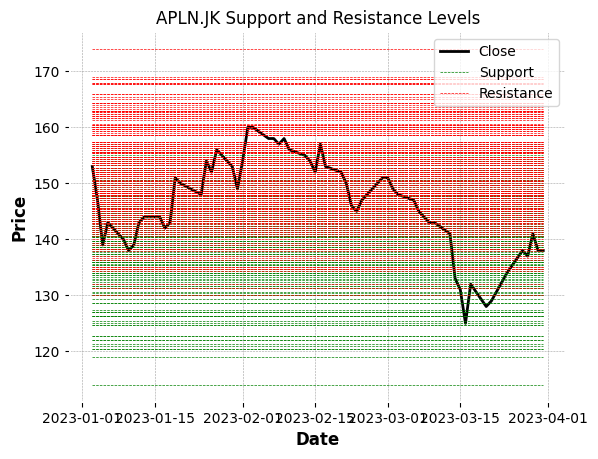

In [6]:
# Plot a chart showing the support and resistance levels
fig, ax = plt.subplots()
ax.plot(stock_data.index, stock_data['Close'], label='Close', color='black')
ax.hlines(y=[support1, support2, support3], xmin=stock_data.index[0], xmax=stock_data.index[-1], color='green', linewidth=0.5, linestyle='--', label='Support')
ax.hlines(y=[resistance1, resistance2, resistance3], xmin=stock_data.index[0], xmax=stock_data.index[-1], color='red', linewidth=0.5, linestyle='--', label='Resistance')
ax.legend()
ax.set(title=symbol+' Support and Resistance Levels', ylabel='Price', xlabel='Date')
ax.grid(True)
plt.show()

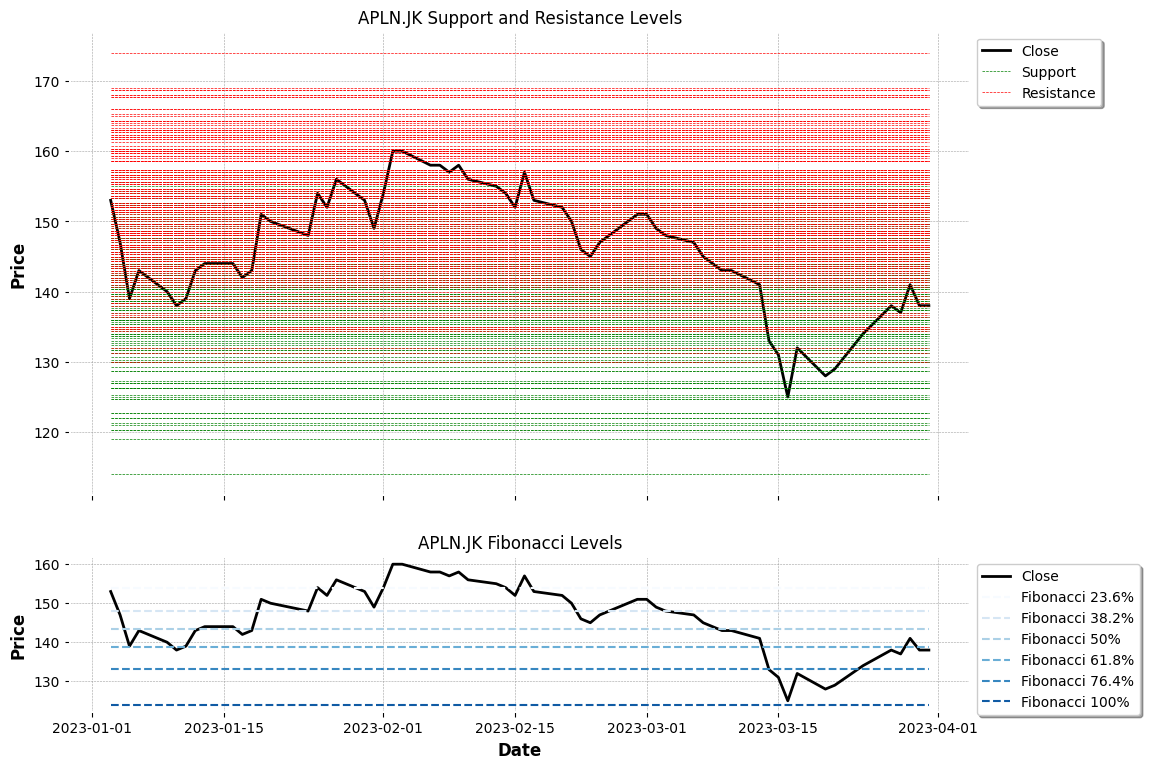

In [7]:
# Plot a chart showing the support and resistance levels
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].plot(stock_data.index, stock_data['Close'], label='Close', color='black')
ax[0].hlines(y=[support1, support2, support3], xmin=stock_data.index[0], xmax=stock_data.index[-1], color='green', linewidth=0.5, linestyle='--', label='Support')
ax[0].hlines(y=[resistance1, resistance2, resistance3], xmin=stock_data.index[0], xmax=stock_data.index[-1], color='red', linewidth=0.5, linestyle='--', label='Resistance')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fancybox=True, shadow=True)
ax[0].set(title=symbol+' Support and Resistance Levels', ylabel='Price')
ax[0].grid(True)

# Plot a chart showing the Fibonacci levels
ax[1].plot(stock_data.index, stock_data['Close'], label='Close', color='black')
fib_levels_names = ['Fibonacci 23.6%', 'Fibonacci 38.2%', 'Fibonacci 50%', 'Fibonacci 61.8%', 'Fibonacci 76.4%', 'Fibonacci 100%']
for i, level in enumerate(fib_levels):
    ax[1].hlines(y=level, xmin=stock_data.index[0], xmax=stock_data.index[-1], color=plt.cm.Blues(i/len(fib_levels)), linewidth=1.5, linestyle='--', label=fib_levels_names[i])
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fancybox=True, shadow=True)
ax[1].set(title=symbol+' Fibonacci Levels', ylabel='Price', xlabel='Date')
ax[1].grid(True)


# Adjust the layout and spacing of the subplots
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.95, wspace=None, hspace=0.2)

plt.show()
